Убедимся в том, что всё так происходит на самом деле. Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

Важно: задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=rs)

np.random.seed(0)
my_awesome_tree = DecisionTreeClassifier(...)
или

my_awesome_tree = DecisionTreeClassifier(random_state=0, ...)

In [137]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [138]:
from IPython.display import SVG 
from IPython.display import display
from graphviz import Source

In [139]:
from IPython .display import HTML
style = "<style>svg{width:50% !important;height:50% !important;}</style>"
np.random.seed(0)

1. ЗАГРУЗКА И ПОДГОТОВКА ДАННЫХ

In [140]:
train_iris = pd.read_csv('E:\\pyrhon\\progectTEST\\2.4.3\\train_iris.csv') #загружаем датасет

In [141]:
train_iris.head(10) #Выводим первые 10 строк

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2
5,42,4.4,3.2,1.3,0.2,0
6,82,5.8,2.7,3.9,1.2,1
7,120,6.9,3.2,5.7,2.3,2
8,127,6.1,3.0,4.9,1.8,2
9,98,5.1,2.5,3.0,1.1,1


In [142]:
test_iris = pd.read_csv('E:\\pyrhon\\progectTEST\\2.4.3\\test_iris.csv') #загружаем датасет

In [143]:
test_iris.head(10)  #выводим первые 10 строк

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0
5,125,7.2,3.2,6.0,1.8,2
6,36,5.5,3.5,1.3,0.2,0
7,141,6.9,3.1,5.1,2.3,2
8,12,4.8,3.0,1.4,0.1,0
9,63,6.1,2.9,4.7,1.4,1


Проверяем есть ли NaN в наших таблицах

In [144]:
train_iris.isnull().sum() # Применим функцию isnull(посчитать NaN) и с помощью sum посчитаем сколько всего NaN в таблице

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [145]:
test_iris.isnull().sum() # Применим функцию isnull(посчитать NaN) и с помощью sum посчитаем сколько всего NaN в таблице

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

Теперь необходимо создать переменные, которые будем использовать для обучения, а так же целевую переменну(species). 

In [146]:
#В обучении не будут участвовать столбцы Unnamed: 0 т.к. это id цветка и наша целевая переменная species(то, что предсказываем)
X_train_iris = train_iris.drop(['Unnamed: 0','species'], axis= 1)
# заведем нашу целевую переменную
y_train_iris = train_iris.species

То же самое сделаем с тестовыми данными 

In [178]:
#В обучении не будут участвовать столбцы Unnamed: 0 т.к. это id цветка и наша целевая переменная species(то, что предсказываем)
X_test_iris = test_iris.drop(['Unnamed: 0','species'], axis= 1)
# заведем нашу целевую переменную
y_test_iris = test_iris.species

# загрузка и обработка данных завершена

2. ОБУЧАЕЩЕЕ ДЕРЕВО

In [179]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=0) # переменная - классификатор 

Чтобы определить оптимальную глубину обучения, надо перебрать max_depth и посмотреть на значения. Перебирать будем с помощью цикла for

In [180]:
max_depth_values = range(1,100) #создаем переменную по которой будет бегать цикл, глубина дерева не равна 0
score_data = pd.DataFrame() #создаем пустой дата фрей, куда будем записывать полученые в цикле значения  

In [189]:
for max_depth in max_depth_values:
    # классификатор с зн-м max_depth
    # при построении дерева используется рандом, значением random_state=0 устанавливает зерно = 0, чтобы графики с степиком не отличались
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth, random_state=0) 
    
    clf.fit(X_train_iris,y_train_iris) # обучение на тестовых данных 
    train_score = clf.score(X_train_iris,y_train_iris) # показатель правильных ответов тна трейне
    test_score = clf.score(X_test_iris,y_test_iris) # показатель правильных ответов на тесте
    
    # далее в нутри цикла создадим дата фрейм со столбцами max_depth,train_score,test_score
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],'train_score':[train_score],'test_score':[test_score]})
    
    #теперь занесем temp_score_data в основной датафрейм(score_data)
    
    score_data = score_data.append(temp_score_data)

In [191]:
score_data.head(10) #смотрим первые 10 значений  в финальном датафрейме

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92
0,6,1.00,0.94
0,7,1.00,0.94
0,8,1.00,0.92
0,9,1.00,0.92
0,10,1.00,0.92


3. ВИЗУАЛИЗАЦИЯ
Преобразуем полученную таблицу с помощью функции melt

In [192]:
score_data_final = pd.melt(score_data, id_vars =['max_depth'], value_vars = ['train_score','test_score'],
                           var_name = 'set_type', value_name = 'score')

In [193]:
score_data_final.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


Далее мы можем построить график, ось x = 'max_depth', ось y = 'score', по каким значениям строим кривые hue = 'set_type', откуда брать значения data= score_data_final

<AxesSubplot:xlabel='max_depth', ylabel='score'>

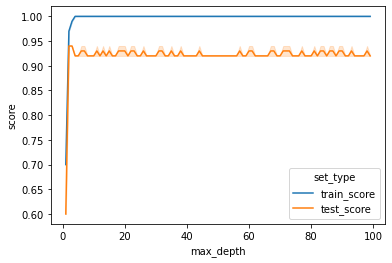

In [194]:
sns.lineplot(x='max_depth', y = 'score', hue = 'set_type', data= score_data_final)